In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import numpy as np

In [23]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
train_dir = '/content/drive/MyDrive/computerVision/Flowers/Train'
validation_dir = '/content/drive/MyDrive/computerVision/Flowers/Validation'

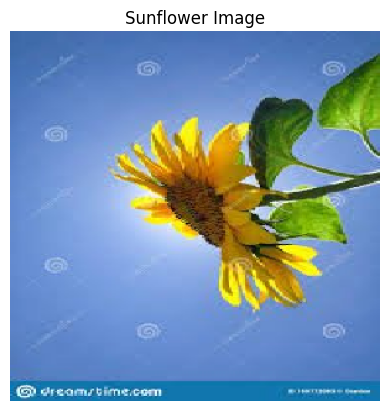

In [25]:
# Directory path for the 'sunflower' images
sunflower_dir = '/content/drive/MyDrive/computerVision/Flowers/Train/Sunflower'

# Get a list of image file names in the 'sunflower' folder
image_files = os.listdir(sunflower_dir)

# Choose one image file
image_file = image_files[0]

# Load the chosen image
img_path = os.path.join(sunflower_dir, image_file)
img = image.load_img(img_path, target_size=(299, 299))

# Display the image
plt.imshow(img)
plt.title('Sunflower Image')
plt.axis('off')
plt.show()

In [26]:
# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # InceptionV3 input size
    batch_size=32,
    class_mode='categorical')

Found 2000 images belonging to 5 classes.


In [28]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical')

Found 250 images belonging to 5 classes.


In [29]:
# Create InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [30]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [31]:
# Create custom model on top of the base model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(5, activation='softmax'))  # 5 classes for the 5 flower types

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 21813029 (83.21 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [33]:
# Train the model
r = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
63/63 [==============================] - 768s 12s/step - loss: 1.0608 - accuracy: 0.6075 - val_loss: 0.7569 - val_accuracy: 0.7440
Epoch 2/10
63/63 [==============================] - 54s 852ms/step - loss: 0.6104 - accuracy: 0.8125 - val_loss: 0.6489 - val_accuracy: 0.7720
Epoch 3/10
63/63 [==============================] - 54s 857ms/step - loss: 0.5116 - accuracy: 0.8260 - val_loss: 0.6232 - val_accuracy: 0.7560
Epoch 4/10
63/63 [==============================] - 54s 859ms/step - loss: 0.4331 - accuracy: 0.8720 - val_loss: 0.5663 - val_accuracy: 0.7920
Epoch 5/10
63/63 [==============================] - 54s 870ms/step - loss: 0.3976 - accuracy: 0.8745 - val_loss: 0.5911 - val_accuracy: 0.7640
Epoch 6/10
63/63 [==============================] - 55s 868ms/step - loss: 0.3639 - accuracy: 0.8815 - val_loss: 0.5712 - val_accuracy: 0.7720
Epoch 7/10
63/63 [==============================] - 55s 857ms/step - loss: 0.3312 - accuracy: 0.9010 - val_loss: 0.5385 - val_accuracy: 0.8080


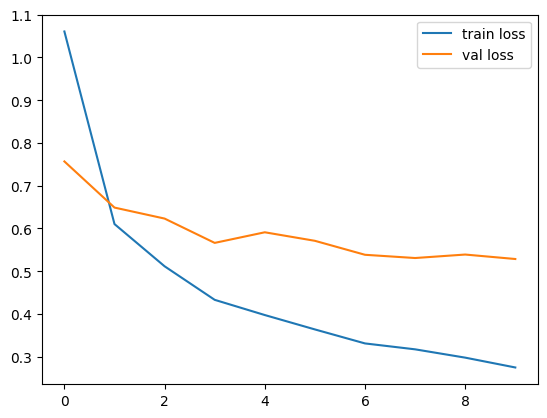

In [34]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

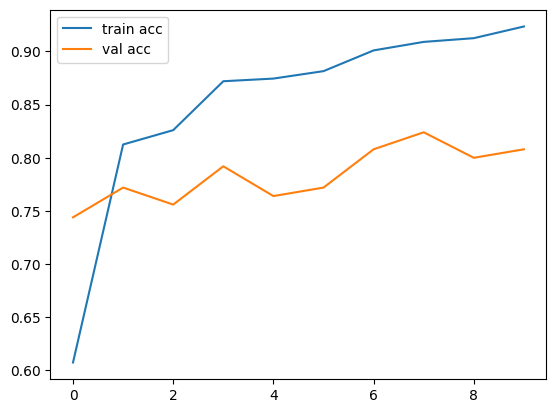

In [35]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [37]:

def predict_and_display(model, image_path, class_labels):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_labels[predicted_class]

    # Display the image
    plt.imshow(img)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()
class_labels_example = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']  # Replace with your actual class labels


1/1 [==============================] - 3s 3s/step


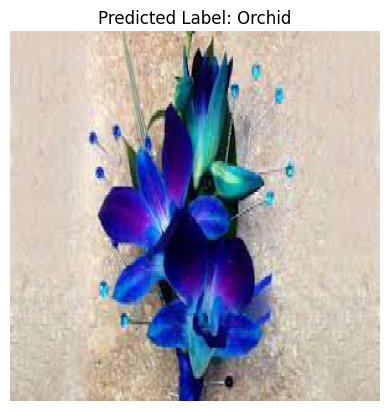

In [40]:
image_path_example = '/content/drive/MyDrive/computerVision/Flowers/Validation/Orchid/c33129c7d6.jpg'
predict_and_display(model, image_path_example, class_labels_example)

1/1 [==============================] - 0s 45ms/step


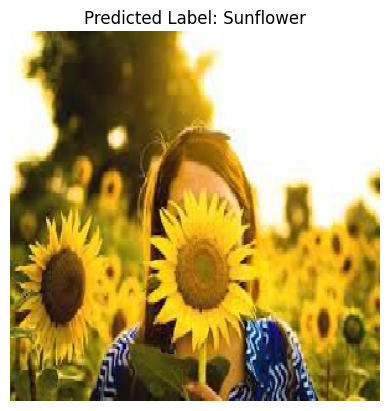

In [41]:
image_path_example = '/content/drive/MyDrive/computerVision/Flowers/Validation/Sunflower/f18e3c5062.jpg'
predict_and_display(model, image_path_example, class_labels_example)

1/1 [==============================] - 0s 26ms/step


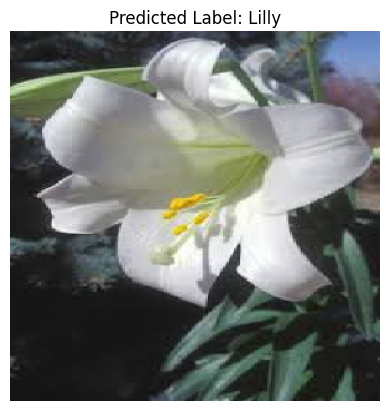

In [45]:
image_path_example = '/content/drive/MyDrive/computerVision/Flowers/Validation/Lilly/b655d82b13.jpg'
predict_and_display(model, image_path_example, class_labels_example)

1/1 [==============================] - 0s 44ms/step


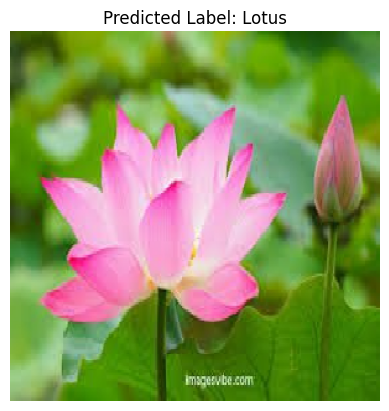

In [46]:
image_path_example = '/content/drive/MyDrive/computerVision/Flowers/Validation/Lotus/c9947e1d91.jpg'
predict_and_display(model, image_path_example, class_labels_example)

1/1 [==============================] - 0s 47ms/step


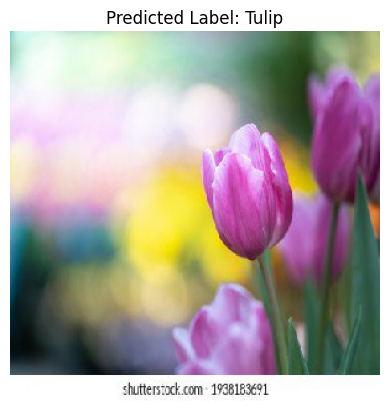

In [47]:
image_path_example = '/content/drive/MyDrive/computerVision/Flowers/Validation/Tulip/eb2e456c5f.jpg'
predict_and_display(model, image_path_example, class_labels_example)

In [48]:
#collab link:https://drive.google.com/drive/folders/103dSV4O1hJueqbFS_28YQQdZTlLvuYXs

8/8 [==============================] - 3s 239ms/step


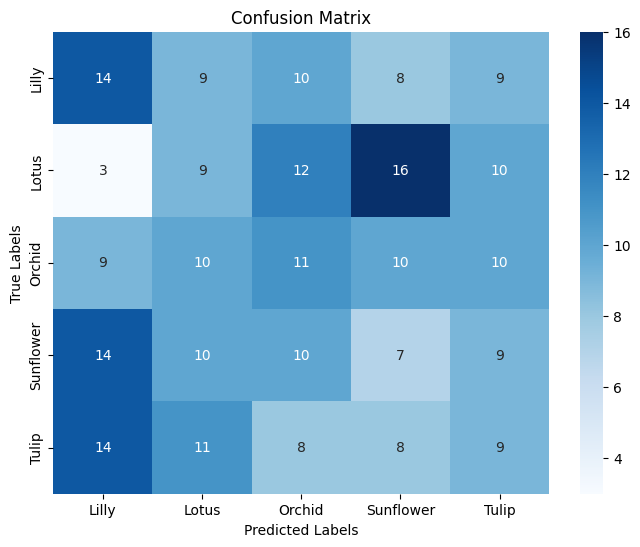

Classification Report:
              precision    recall  f1-score   support

       Lilly       0.26      0.28      0.27        50
       Lotus       0.18      0.18      0.18        50
      Orchid       0.22      0.22      0.22        50
   Sunflower       0.14      0.14      0.14        50
       Tulip       0.19      0.18      0.19        50

    accuracy                           0.20       250
   macro avg       0.20      0.20      0.20       250
weighted avg       0.20      0.20      0.20       250



In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

y_true = validation_generator.classes

# Generate predictions
y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Class labels
class_labels_example = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_example, yticklabels=class_labels_example)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels_example))
